<a href="https://colab.research.google.com/github/Hullyborges/text-mining/blob/main/text_mining_restaurant_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk wordcloud spacy
!python -m spacy download pt_core_news_sm

import nltk
nltk.download('stopwords')
nltk.download('rslp')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import RSLPStemmer
import spacy
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 72.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Hullyborges/text-mining/refs/heads/main/Restaurant_Reviews.tsv',sep='\t', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df_review = df['Review']

In [6]:
#Check sample data
df_review.sample(10)

,Review
712,2 Thumbs Up!!
368,"The staff are great, the ambiance is great."
311,She ordered a toasted English muffin that came...
792,Paying $7.85 for a hot dog and fries that look...
180,The burger had absolutely no flavor - the meat...
607,I just wanted to leave.
476,We enjoy their pizza and brunch.
945,The chipolte ranch dipping sause was tasteless...
15,I was shocked because no signs indicate cash o...
135,"Great Subway, in fact it's so good when you co..."


In [8]:
tokenizer = ToktokTokenizer()
stopwords_en = set(stopwords.words('english'))

# Lista para armazenar os tokens de todos os depoimentos
tokens_totais = []


# Iterar sobre cada depoimento
for depoimento in df_review:
    # Tokenização do depoimento
    tokens = tokenizer.tokenize(depoimento)
    # Converter para minúsculas e filtrar tokens:
    #  - Remover stopwords
    #  - Manter apenas tokens que contenham apenas letras (ignora números e pontuações)
    tokens_filtrados = [token.lower() for token in tokens
                         if token.lower() not in stopwords_en and token.isalpha()]
    tokens_totais.extend(tokens_filtrados)

# Contar a frequência dos tokens
frequencia = Counter(tokens_totais)

# Exibir as 20 palavras mais comuns
top_10 = frequencia.most_common(10)
print(top_10)

[('food', 125), ('place', 106), ('good', 95), ('service', 83), ('great', 70), ('back', 61), ('like', 46), ('go', 43), ('time', 42), ('really', 36)]


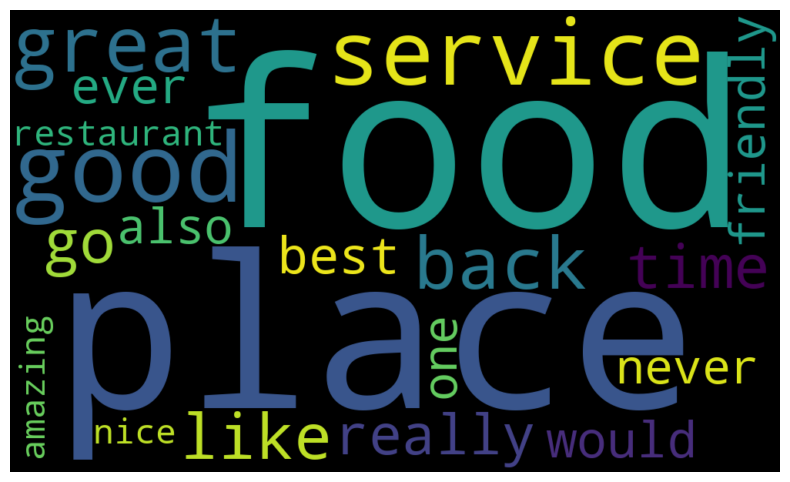

In [12]:
# Considerando que a variável 'frequencia' é um objeto Counter
# com os tokens e suas respectivas frequências. Se desejar usar apenas os top 10:
top_20 = dict(frequencia.most_common(20))

# Gerar a nuvem de palavras com os top 20
wordcloud = WordCloud(width=1000, height=600, background_color='black', random_state=100).generate_from_frequencies(top_20)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
from nltk.stem import RSLPStemmer

# Inicializa o stemmer para português
stemmer = RSLPStemmer()

# Dicionário para armazenar o stem e a contagem agregada
stemmed_counts = {}

for word, count in top_20.items():
    # Aplica o stemming na palavra
    stem = stemmer.stem(word)
    # Agrega a contagem para o stem correspondente
    stemmed_counts[stem] = stemmed_counts.get(stem, 0) + count

print(stemmed_counts)

{'food': 125, 'plac': 106, 'good': 95, 'serv': 83, 'great': 70, 'back': 61, 'lik': 46, 'go': 43, 'tim': 42, 'really': 36, 'best': 30, 'would': 29, 'ev': 28, 'als': 27, 'friendly': 27, 'nev': 26, 'one': 26, 'restaurant': 25, 'amazing': 24, 'nic': 24}


In [15]:
# Dicionário para armazenar os lemas e a contagem agregada
lemmatized_counts = {}

# Itera sobre as palavras do dicionário
for word, count in top_20.items():
    # Processa a palavra com o spaCy
    doc = nlp(word)
    # Como estamos processando uma única palavra, pegamos o lema do primeiro token
    lemma = doc[0].lemma_
    # Agrega a contagem para o lema correspondente
    lemmatized_counts[lemma] = lemmatized_counts.get(lemma, 0) + count

print(lemmatized_counts)

{'food': 125, 'place': 106, 'good': 95, 'service': 83, 'great': 70, 'back': 61, 'like': 46, 'go': 43, 'time': 42, 'really': 36, 'well': 30, 'would': 29, 'ever': 28, 'also': 27, 'friendly': 27, 'never': 26, 'one': 26, 'restaurant': 25, 'amazing': 24, 'nice': 24}


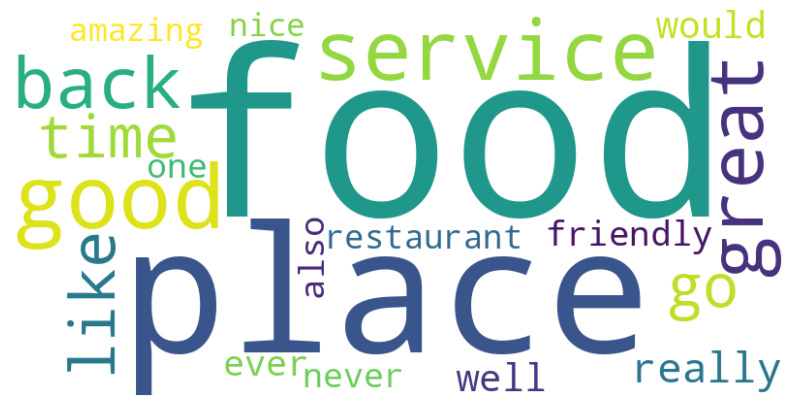

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=100).generate_from_frequencies(lemmatized_counts)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()